<a href="https://colab.research.google.com/github/Witcape/Emotion_Recognition_in_Live_Video_Data/blob/main/Emotion_Recognition_in_Video_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEP 1 - Import all the Libraries and google drive

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sklearn
import tensorflow as tf
import pandas as pd
import sklearn
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.activations import linear,relu,sigmoid
import cv2
import os
import PIL
from google.colab.patches import cv2_imshow
import pathlib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.preprocessing import image
import tensorflow_datasets as tfds

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Step 2 - Loading Data & Preprocessing

In [3]:
train_data_dir = '/content/gdrive/MyDrive/Human emotions/train'
test_data_dir = '/content/gdrive/MyDrive/Human emotions/test'

In [4]:
picture_size = 48
batch_size = 32
no_of_classes = 7
epochs = 20

datagen_train = ImageDataGenerator (
                                    rescale=1./255,
                                    validation_split=0.2
                                    )

datagen_val   = ImageDataGenerator (
                                    rescale=1./255
                                    )
datagen_test   = ImageDataGenerator (
                                    rescale=1./255
                                    )

In [5]:
train_set = datagen_train.flow_from_directory(
    train_data_dir,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_set = datagen_val.flow_from_directory(
    test_data_dir,

    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 29031 images belonging to 7 classes.
Found 7378 images belonging to 7 classes.


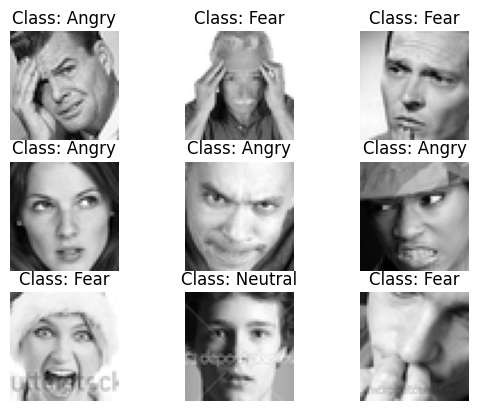

In [6]:
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

count = 0
for batch_images, batch_labels in train_set:
    for i in range(batch_size):

        if count < 9:
            plt.subplot(3, 3, count + 1)
            plt.imshow(batch_images[i].reshape(picture_size, picture_size), cmap='gray')
            class_index = batch_labels[i].argmax()
            class_name = class_names[class_index]
            plt.title(f'Class: {class_name}')
            plt.axis('off')
            count += 1

    if count >= 9:
        break

plt.show()


## Step 3 - Model

In [7]:
model = Sequential(
    [
        Conv2D(128, (3,3), 1,  activation = 'relu', padding='same', input_shape = (picture_size, picture_size, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        BatchNormalization(),

        Conv2D(256, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(512, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(256, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Flatten(),

        Dense(512, activation = 'relu'),
        Dense(7, activation = 'softmax')
    ]
)

In [8]:
# model.compile(
#     optimizer = Adam(learning_rate = 0.01),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 256)      1

In [10]:
# log_dir = '/content/gdrive/MyDrive/Human emotions/Logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [11]:
# early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3, monitor='val_loss', min_lr=0.00001)

In [12]:
# history = model.fit(
#     train_set,
#     epochs=2,
#     validation_data=val_set,
#     callbacks=[early_stopping, reduce_lr]
# )

In [13]:
loaded_model = load_model('/content/gdrive/MyDrive/Human emotions/val_acc_61', compile=False)

loaded_model.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [139]:
#predictions = loaded_model.predict(val_set)

In [140]:
#predicted_classes = np.argmax(predictions, axis=1)

In [141]:
#accuracy = loaded_model.evaluate(val_set)[1]

In [142]:
def image_test(image_path):
  image = cv2.imread(image_path)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (48, 48))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0
  return img, img_array

In [143]:
image_path = '/content/what-makes-people-happy-773814203'
img, img_array = image_test(image_path)

In [144]:
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions[0])
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class]
predicted_emotion

1/1 [==============================] - 0s 30ms/step


'Sad'

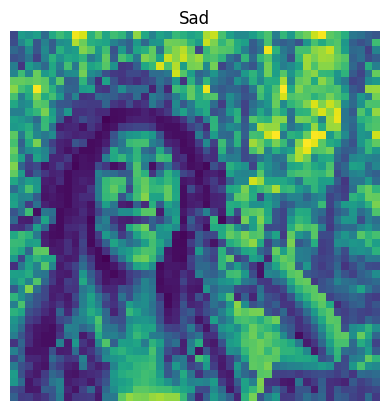

In [145]:
plt.imshow(img)
plt.title(predicted_emotion)
plt.axis('off')
plt.show()

## Trying to make it work with video frames

In [148]:
def preprocess(frame):
    img = image.array_to_img(frame)
    img = img.resize((48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [149]:
def overlay_emoji(frame, emoji):
    # Define the position and size for overlay
    x_position = 100  # Adjust as needed
    y_position = 100  # Adjust as needed
    emoji_height, emoji_width, _ = emoji.shape
    emoji_size = (emoji_width, emoji_height)

    # Resize emoji to the desired size
    resized_emoji = cv2.resize(emoji, emoji_size)

    # Overlay emoji on the frame
    for y in range(emoji_height):
        for x in range(emoji_width):
            if emoji[y, x].any() > 0:
                frame[y + y_position, x + x_position] = emoji[y, x]

    return frame


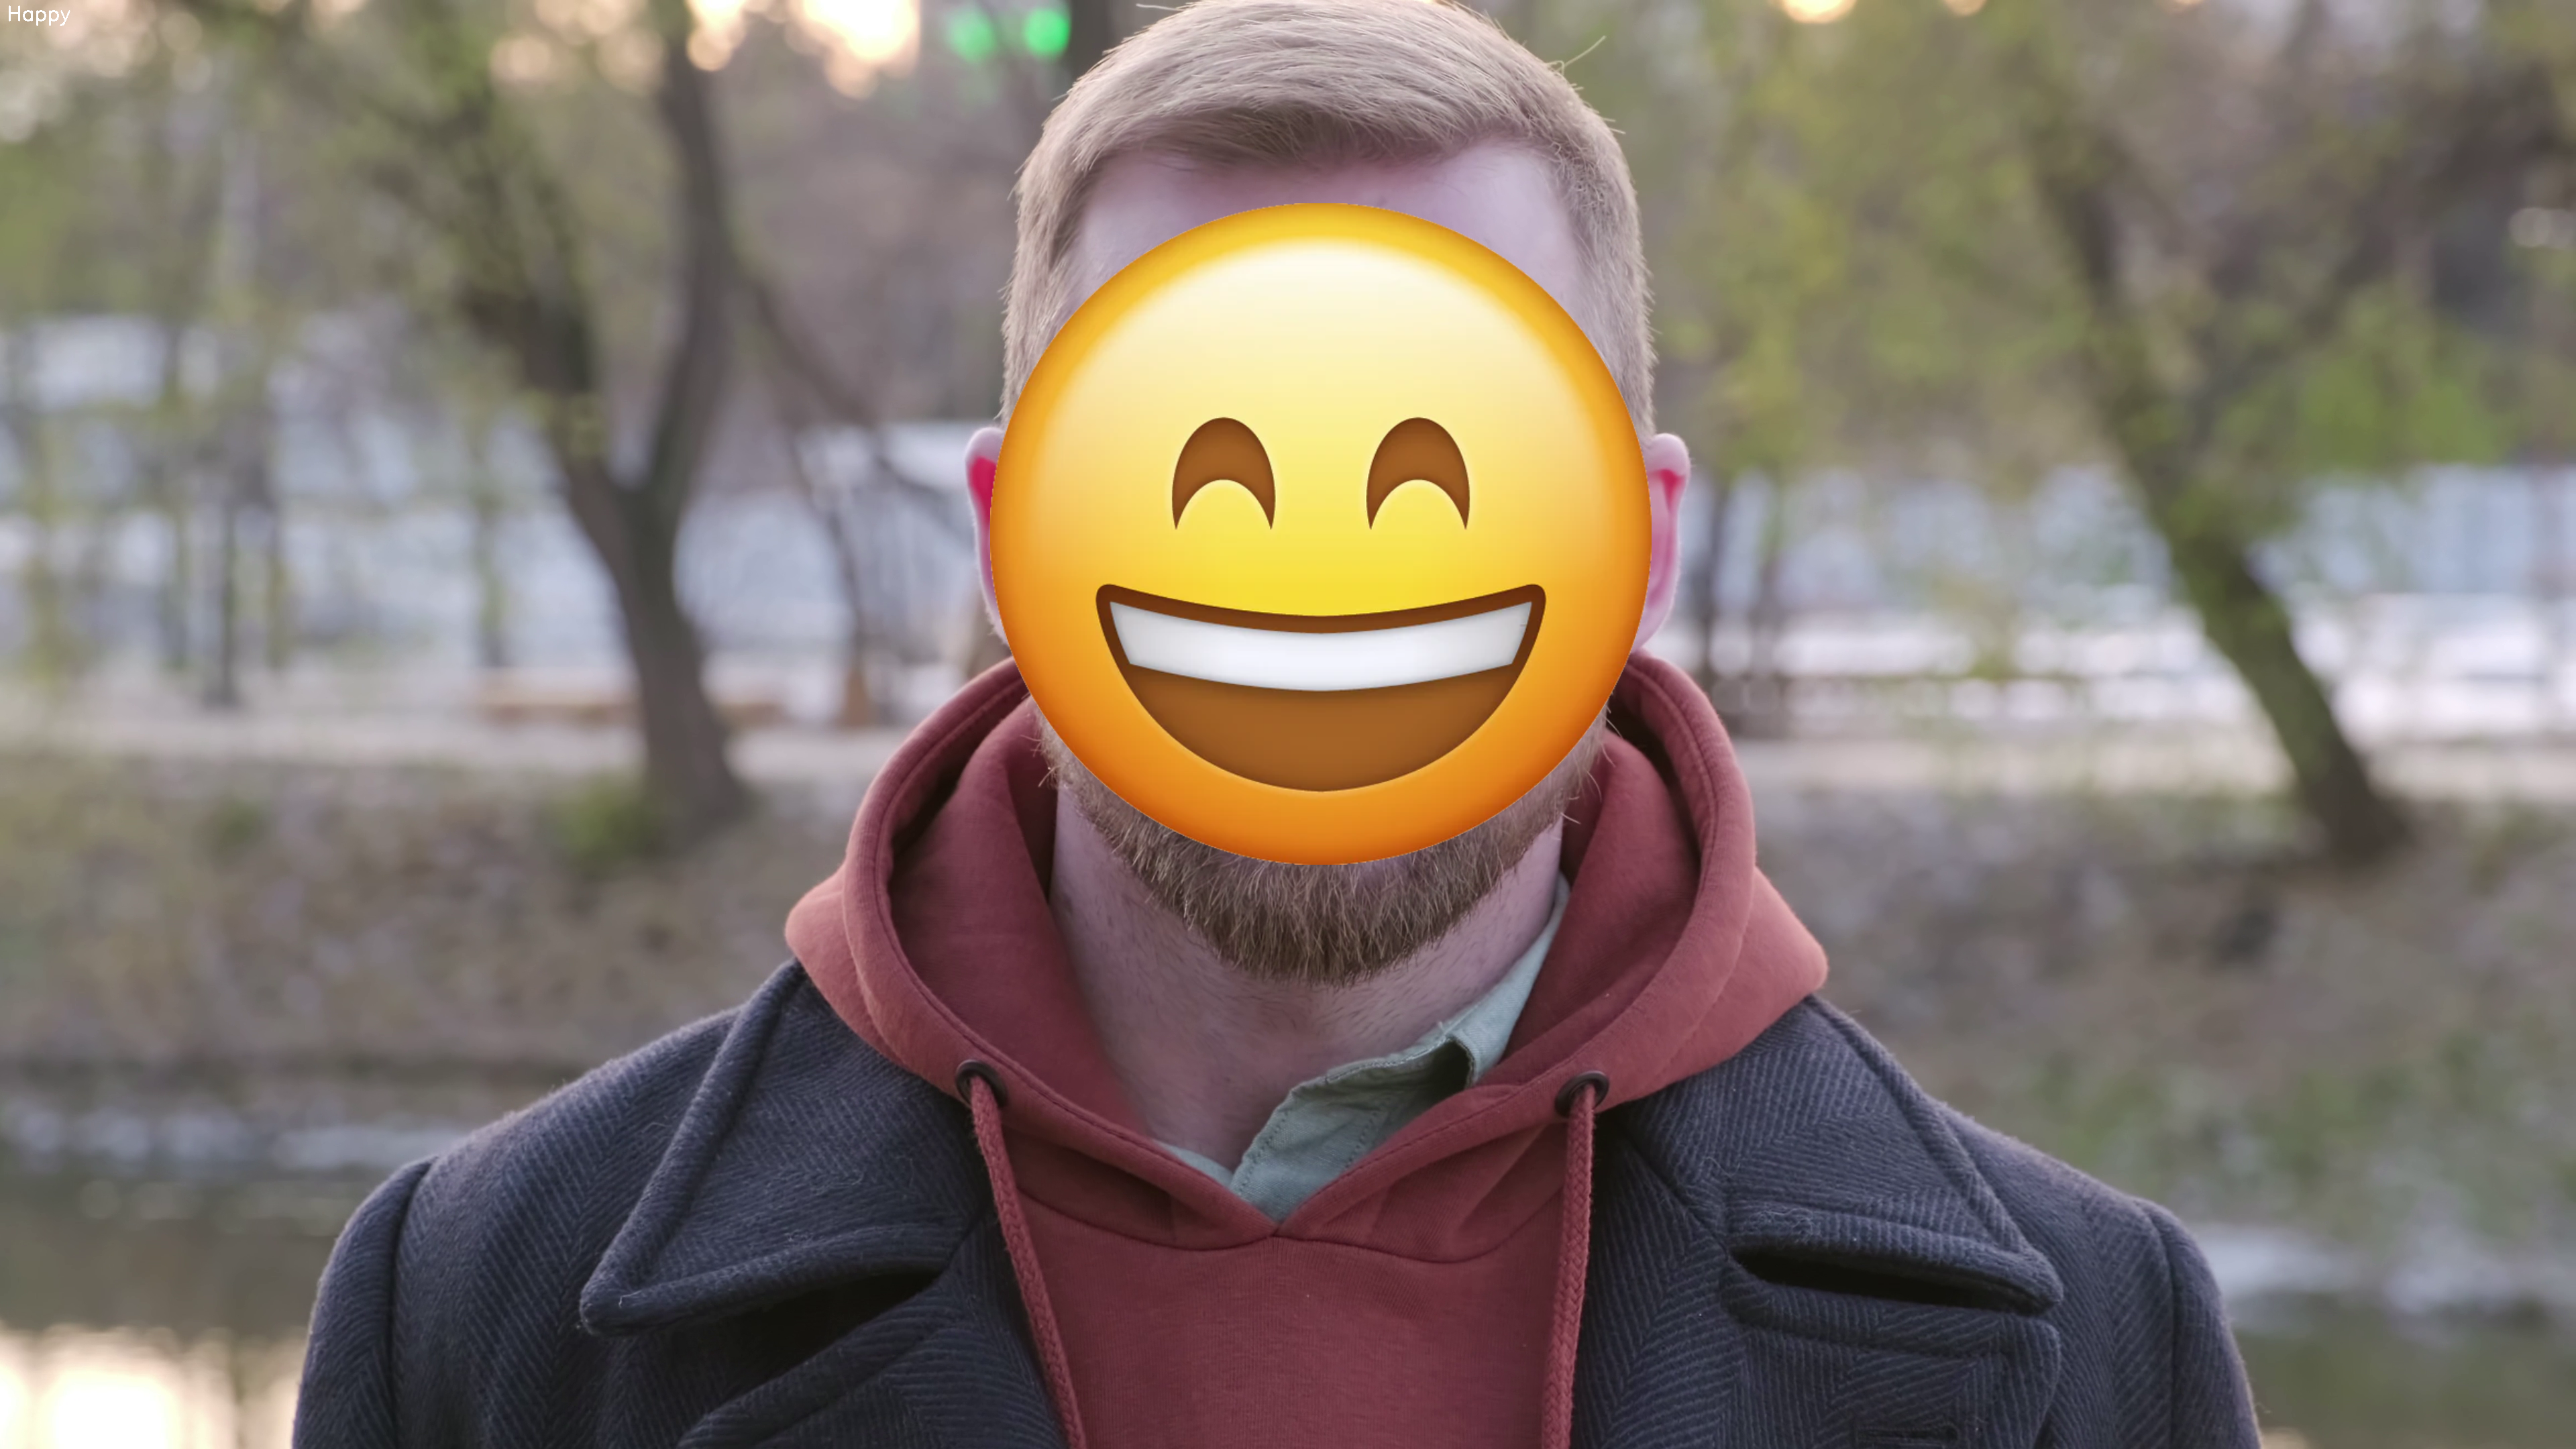

1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: ignored

In [163]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your emoji images (replace with actual paths)
emoji_happy = cv2.imread('/content/Emoji_Icon_-_Happy_grande.png', cv2.IMREAD_UNCHANGED)
emoji_sad = cv2.imread('/content/1301071-download-free-funny-emoji-wallpapers-2000x2000-lockscreen-removebg-preview.png', cv2.IMREAD_UNCHANGED)
emoji_angry = cv2.imread('/content/a424a8bb2bb2e25e38630e5df7ace99a-removebg-preview.png', cv2.IMREAD_UNCHANGED)
# Load more emoji images...

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a video capture stream
cap = cv2.VideoCapture('/content/video (2160p).mp4')  # Replace with your video file path

frame_counter = 0  # Initialize frame counter
frame_skip = 5     # Process every 5th frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    if frame_counter % frame_skip != 0:  # Skip frames
        continue

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Preprocess the face region
        face_region = gray_frame[y:y+h, x:x+w]
        processed_face = cv2.resize(face_region, (48, 48)) / 255.0  # Resize and normalize

        # Make emotion prediction
        predicted_emotion = model.predict(np.expand_dims(processed_face, axis=0))
        predicted_emotion = np.argmax(predicted_emotion)

        # Select emoji based on predicted emotion
        if predicted_emotion == 0:  # Happy
            emoji = emoji_happy
        elif predicted_emotion == 1:  # Sad
            emoji = emoji_sad
        elif predicted_emotion == 2:  # Angry
            emoji = emoji_angry
        # Select more emojis...

        # Resize emoji to match face size
        emoji_resized = cv2.resize(emoji, (w, h))

        # Overlay emoji on the frame
        for i in range(h):
            for j in range(w):
                if emoji_resized[i, j, 3] > 0:  # Check alpha channel
                    alpha = emoji_resized[i, j, 3] / 255.0
                    frame[y + i, x + j] = (1 - alpha) * frame[y + i, x + j] + alpha * emoji_resized[i, j, 0:3]

        # Add emotion text in the top-left corner
        emotion_text = "Happy" if predicted_emotion == 0 else "Sad" if predicted_emotion == 1 else "Angry"
        cv2.putText(frame, emotion_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame with emoji overlay
    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
